### 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('./train_santander.csv', encoding='latin-1')
print('dataset shape: ', cust_df.shape)
cust_df.head(3)

dataset shape:  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied 비율: {0:.2f}'.format(unsatisfied_cnt / total_cnt))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율: 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [6]:
# var3 feature 값 대체 및 ID featuer drop
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace = True)

# feature set과 label set 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('Feature data shape: ', X_features.shape)

Feature data shape:  (76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 0)

train_cnt = y_train.count()
test_cnt = y_test.count()

print('Train set shape: {0}, Test set shape: {1}'.format(X_train.shape, X_test.shape))

# 균형함
print('Train set label 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('Test set label 값 분포 비율')
print(y_test.value_counts() / test_cnt)

Train set shape: (60816, 369), Test set shape: (15204, 369)
Train set label 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
Test set label 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators = 500, random_state = 156, use_label_encoder=False)

xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, -1], average = 'macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

In [9]:
from sklearn.model_selection import GridSearchCV

# 수행속도 향상을 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators = 100, use_label_encoder=False)

params = {'max_depth': [5, 7], 'min_child_weight': [1, 3], 'colsample_bytree': [0.5, 0.75]}

# 수행속도 향상을 위해 cv 지정하지 않음
gridcv = GridSearchCV(xgb_clf, param_grid = params)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터: ', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.80038	validation_1-auc:0.79818
[1]	validation_0-auc:0.81995	validation_1-auc:0.81649
[2]	validation_0-auc:0.82649	validation_1-auc:0.82081
[3]	validation_0-auc:0.83183	validation_1-auc:0.82450
[4]	validation_0-auc:0.83650	validation_1-auc:0.82830
[5]	validation_0-auc:0.83943	validation_1-auc:0.83588
[6]	validation_0-auc:0.83793	validation_1-auc:0.83169
[7]	validation_0-auc:0.84466	validation_1-auc:0.83748
[8]	validation_0-auc:0.84785	validation_1-auc:0.83735
[9]	validation_0-auc:0.84684	validation_1-auc:0.83529
[10]	validation_0-auc:0.84625	validation_1-auc:0.83278
[11]	validation_0-auc:0.84769	validation_1-auc:0.83157
[12]	validation_0-auc:0.85326	validation_1-auc:0.83573
[13]	validation_0-auc:0.85730	validation_1-auc:0.83839
[14]	validation_0-auc:0.85934	validation_1-auc:0.83892
[15]	validation_0-auc:0.86089	validation_1-auc:0.83844
[16]	validation_0-auc:0.86256	validation_1-auc:0.83932
[17]	validation_0-auc:0.86398	validation_1-auc:0.83871
[18]	validation_0-au

[14]	validation_0-auc:0.86081	validation_1-auc:0.84093
[15]	validation_0-auc:0.86262	validation_1-auc:0.84069
[16]	validation_0-auc:0.86438	validation_1-auc:0.84129
[17]	validation_0-auc:0.86582	validation_1-auc:0.84054
[18]	validation_0-auc:0.86660	validation_1-auc:0.84019
[19]	validation_0-auc:0.86816	validation_1-auc:0.83925
[20]	validation_0-auc:0.86872	validation_1-auc:0.83902
[21]	validation_0-auc:0.86926	validation_1-auc:0.83853
[22]	validation_0-auc:0.87020	validation_1-auc:0.83887
[23]	validation_0-auc:0.87138	validation_1-auc:0.83898
[24]	validation_0-auc:0.87192	validation_1-auc:0.83943
[25]	validation_0-auc:0.87267	validation_1-auc:0.83958
[26]	validation_0-auc:0.87390	validation_1-auc:0.83941
[27]	validation_0-auc:0.87466	validation_1-auc:0.83954
[28]	validation_0-auc:0.87477	validation_1-auc:0.83958
[29]	validation_0-auc:0.87518	validation_1-auc:0.83951
[30]	validation_0-auc:0.87583	validation_1-auc:0.83913
[31]	validation_0-auc:0.87665	validation_1-auc:0.83859
[32]	valid

[12]	validation_0-auc:0.85350	validation_1-auc:0.83808
[13]	validation_0-auc:0.85748	validation_1-auc:0.84018
[14]	validation_0-auc:0.85936	validation_1-auc:0.84137
[15]	validation_0-auc:0.86035	validation_1-auc:0.84141
[16]	validation_0-auc:0.86170	validation_1-auc:0.84277
[17]	validation_0-auc:0.86261	validation_1-auc:0.84241
[18]	validation_0-auc:0.86332	validation_1-auc:0.84189
[19]	validation_0-auc:0.86468	validation_1-auc:0.84155
[20]	validation_0-auc:0.86554	validation_1-auc:0.84142
[21]	validation_0-auc:0.86602	validation_1-auc:0.84093
[22]	validation_0-auc:0.86679	validation_1-auc:0.84153
[23]	validation_0-auc:0.86744	validation_1-auc:0.84176
[24]	validation_0-auc:0.86781	validation_1-auc:0.84101
[25]	validation_0-auc:0.86901	validation_1-auc:0.84009
[26]	validation_0-auc:0.87031	validation_1-auc:0.84028
[27]	validation_0-auc:0.87125	validation_1-auc:0.84040
[28]	validation_0-auc:0.87151	validation_1-auc:0.84015
[29]	validation_0-auc:0.87236	validation_1-auc:0.83980
[30]	valid

[13]	validation_0-auc:0.85789	validation_1-auc:0.84026
[14]	validation_0-auc:0.85922	validation_1-auc:0.84198
[15]	validation_0-auc:0.86038	validation_1-auc:0.84123
[16]	validation_0-auc:0.86204	validation_1-auc:0.84215
[17]	validation_0-auc:0.86332	validation_1-auc:0.84205
[18]	validation_0-auc:0.86406	validation_1-auc:0.84200
[19]	validation_0-auc:0.86509	validation_1-auc:0.84225
[20]	validation_0-auc:0.86583	validation_1-auc:0.84202
[21]	validation_0-auc:0.86649	validation_1-auc:0.84154
[22]	validation_0-auc:0.86789	validation_1-auc:0.84130
[23]	validation_0-auc:0.86875	validation_1-auc:0.84070
[24]	validation_0-auc:0.86963	validation_1-auc:0.84129
[25]	validation_0-auc:0.87029	validation_1-auc:0.84082
[26]	validation_0-auc:0.87152	validation_1-auc:0.83990
[27]	validation_0-auc:0.87202	validation_1-auc:0.83942
[28]	validation_0-auc:0.87225	validation_1-auc:0.83959
[29]	validation_0-auc:0.87310	validation_1-auc:0.83948
[30]	validation_0-auc:0.87336	validation_1-auc:0.83930
[31]	valid

[21]	validation_0-auc:0.89217	validation_1-auc:0.83881
[22]	validation_0-auc:0.89350	validation_1-auc:0.83922
[23]	validation_0-auc:0.89466	validation_1-auc:0.83897
[24]	validation_0-auc:0.89526	validation_1-auc:0.83921
[25]	validation_0-auc:0.89592	validation_1-auc:0.83930
[26]	validation_0-auc:0.89778	validation_1-auc:0.83983
[27]	validation_0-auc:0.89849	validation_1-auc:0.83885
[28]	validation_0-auc:0.89880	validation_1-auc:0.83913
[29]	validation_0-auc:0.89981	validation_1-auc:0.83865
[30]	validation_0-auc:0.90069	validation_1-auc:0.83884
[31]	validation_0-auc:0.90132	validation_1-auc:0.83787
[32]	validation_0-auc:0.90165	validation_1-auc:0.83734
[33]	validation_0-auc:0.90202	validation_1-auc:0.83749
[34]	validation_0-auc:0.90287	validation_1-auc:0.83740
[35]	validation_0-auc:0.90325	validation_1-auc:0.83765
[36]	validation_0-auc:0.90351	validation_1-auc:0.83767
[37]	validation_0-auc:0.90373	validation_1-auc:0.83737
[38]	validation_0-auc:0.90389	validation_1-auc:0.83727
[39]	valid

[35]	validation_0-auc:0.89327	validation_1-auc:0.83736
[36]	validation_0-auc:0.89346	validation_1-auc:0.83737
[37]	validation_0-auc:0.89445	validation_1-auc:0.83693
[38]	validation_0-auc:0.89521	validation_1-auc:0.83636
[39]	validation_0-auc:0.89590	validation_1-auc:0.83643
[40]	validation_0-auc:0.89615	validation_1-auc:0.83601
[41]	validation_0-auc:0.89623	validation_1-auc:0.83571
[42]	validation_0-auc:0.89673	validation_1-auc:0.83590
[43]	validation_0-auc:0.89700	validation_1-auc:0.83579
[44]	validation_0-auc:0.89776	validation_1-auc:0.83524
[0]	validation_0-auc:0.81707	validation_1-auc:0.81668
[1]	validation_0-auc:0.83059	validation_1-auc:0.82461
[2]	validation_0-auc:0.83731	validation_1-auc:0.82740
[3]	validation_0-auc:0.84251	validation_1-auc:0.82901
[4]	validation_0-auc:0.84709	validation_1-auc:0.82948
[5]	validation_0-auc:0.85009	validation_1-auc:0.83382
[6]	validation_0-auc:0.85057	validation_1-auc:0.82627
[7]	validation_0-auc:0.85827	validation_1-auc:0.83007
[8]	validation_0-a

[43]	validation_0-auc:0.89182	validation_1-auc:0.84038
[44]	validation_0-auc:0.89289	validation_1-auc:0.83963
[45]	validation_0-auc:0.89295	validation_1-auc:0.83964
[46]	validation_0-auc:0.89316	validation_1-auc:0.83954
[47]	validation_0-auc:0.89375	validation_1-auc:0.83930
[0]	validation_0-auc:0.81085	validation_1-auc:0.80372
[1]	validation_0-auc:0.83539	validation_1-auc:0.82534
[2]	validation_0-auc:0.84053	validation_1-auc:0.82722
[3]	validation_0-auc:0.84430	validation_1-auc:0.82981
[4]	validation_0-auc:0.84814	validation_1-auc:0.83158
[5]	validation_0-auc:0.85204	validation_1-auc:0.83567
[6]	validation_0-auc:0.85209	validation_1-auc:0.83069
[7]	validation_0-auc:0.86086	validation_1-auc:0.83681
[8]	validation_0-auc:0.86762	validation_1-auc:0.83791
[9]	validation_0-auc:0.86651	validation_1-auc:0.83835
[10]	validation_0-auc:0.86632	validation_1-auc:0.83648
[11]	validation_0-auc:0.86635	validation_1-auc:0.83540
[12]	validation_0-auc:0.87323	validation_1-auc:0.83879
[13]	validation_0-au

[51]	validation_0-auc:0.88752	validation_1-auc:0.83700
[52]	validation_0-auc:0.88768	validation_1-auc:0.83696
[53]	validation_0-auc:0.88802	validation_1-auc:0.83677
[0]	validation_0-auc:0.81089	validation_1-auc:0.80218
[1]	validation_0-auc:0.82416	validation_1-auc:0.81655
[2]	validation_0-auc:0.82907	validation_1-auc:0.82162
[3]	validation_0-auc:0.83437	validation_1-auc:0.82552
[4]	validation_0-auc:0.83915	validation_1-auc:0.82865
[5]	validation_0-auc:0.84195	validation_1-auc:0.83351
[6]	validation_0-auc:0.84450	validation_1-auc:0.83395
[7]	validation_0-auc:0.84723	validation_1-auc:0.83554
[8]	validation_0-auc:0.84879	validation_1-auc:0.83601
[9]	validation_0-auc:0.85137	validation_1-auc:0.84014
[10]	validation_0-auc:0.85217	validation_1-auc:0.83916
[11]	validation_0-auc:0.85200	validation_1-auc:0.83724
[12]	validation_0-auc:0.85661	validation_1-auc:0.83892
[13]	validation_0-auc:0.86007	validation_1-auc:0.84146
[14]	validation_0-auc:0.86206	validation_1-auc:0.84135
[15]	validation_0-au

[12]	validation_0-auc:0.85593	validation_1-auc:0.83832
[13]	validation_0-auc:0.85809	validation_1-auc:0.83893
[14]	validation_0-auc:0.86009	validation_1-auc:0.84082
[15]	validation_0-auc:0.86103	validation_1-auc:0.84018
[16]	validation_0-auc:0.86269	validation_1-auc:0.84030
[17]	validation_0-auc:0.86354	validation_1-auc:0.83951
[18]	validation_0-auc:0.86449	validation_1-auc:0.83809
[19]	validation_0-auc:0.86507	validation_1-auc:0.83840
[20]	validation_0-auc:0.86610	validation_1-auc:0.83857
[21]	validation_0-auc:0.86711	validation_1-auc:0.83863
[22]	validation_0-auc:0.86806	validation_1-auc:0.83779
[23]	validation_0-auc:0.86850	validation_1-auc:0.83750
[24]	validation_0-auc:0.87022	validation_1-auc:0.83677
[25]	validation_0-auc:0.87042	validation_1-auc:0.83707
[26]	validation_0-auc:0.87080	validation_1-auc:0.83697
[27]	validation_0-auc:0.87118	validation_1-auc:0.83686
[28]	validation_0-auc:0.87255	validation_1-auc:0.83661
[29]	validation_0-auc:0.87276	validation_1-auc:0.83686
[30]	valid

[26]	validation_0-auc:0.86809	validation_1-auc:0.84127
[27]	validation_0-auc:0.86832	validation_1-auc:0.84105
[28]	validation_0-auc:0.86867	validation_1-auc:0.84109
[29]	validation_0-auc:0.86902	validation_1-auc:0.84083
[30]	validation_0-auc:0.86942	validation_1-auc:0.84051
[31]	validation_0-auc:0.86966	validation_1-auc:0.84064
[32]	validation_0-auc:0.86990	validation_1-auc:0.84041
[33]	validation_0-auc:0.87056	validation_1-auc:0.83957
[34]	validation_0-auc:0.87082	validation_1-auc:0.83952
[35]	validation_0-auc:0.87114	validation_1-auc:0.83927
[36]	validation_0-auc:0.87149	validation_1-auc:0.83879
[37]	validation_0-auc:0.87179	validation_1-auc:0.83847
[38]	validation_0-auc:0.87209	validation_1-auc:0.83799
[39]	validation_0-auc:0.87234	validation_1-auc:0.83813
[40]	validation_0-auc:0.87299	validation_1-auc:0.83772
[41]	validation_0-auc:0.87301	validation_1-auc:0.83779
[42]	validation_0-auc:0.87347	validation_1-auc:0.83801
[43]	validation_0-auc:0.87413	validation_1-auc:0.83806
[44]	valid

[29]	validation_0-auc:0.90025	validation_1-auc:0.83764
[30]	validation_0-auc:0.90068	validation_1-auc:0.83732
[31]	validation_0-auc:0.90098	validation_1-auc:0.83711
[32]	validation_0-auc:0.90126	validation_1-auc:0.83703
[33]	validation_0-auc:0.90158	validation_1-auc:0.83729
[34]	validation_0-auc:0.90292	validation_1-auc:0.83776
[35]	validation_0-auc:0.90395	validation_1-auc:0.83723
[36]	validation_0-auc:0.90511	validation_1-auc:0.83743
[37]	validation_0-auc:0.90564	validation_1-auc:0.83724
[38]	validation_0-auc:0.90609	validation_1-auc:0.83717
[39]	validation_0-auc:0.90629	validation_1-auc:0.83721
[40]	validation_0-auc:0.90643	validation_1-auc:0.83697
[0]	validation_0-auc:0.82490	validation_1-auc:0.81500
[1]	validation_0-auc:0.83356	validation_1-auc:0.81904
[2]	validation_0-auc:0.83930	validation_1-auc:0.82372
[3]	validation_0-auc:0.84568	validation_1-auc:0.83061
[4]	validation_0-auc:0.85124	validation_1-auc:0.82996
[5]	validation_0-auc:0.85564	validation_1-auc:0.83677
[6]	validation_0

[1]	validation_0-auc:0.83227	validation_1-auc:0.82320
[2]	validation_0-auc:0.83734	validation_1-auc:0.82717
[3]	validation_0-auc:0.84188	validation_1-auc:0.82847
[4]	validation_0-auc:0.84730	validation_1-auc:0.83239
[5]	validation_0-auc:0.85092	validation_1-auc:0.83564
[6]	validation_0-auc:0.85523	validation_1-auc:0.83781
[7]	validation_0-auc:0.85937	validation_1-auc:0.83849
[8]	validation_0-auc:0.86182	validation_1-auc:0.83850
[9]	validation_0-auc:0.86591	validation_1-auc:0.83823
[10]	validation_0-auc:0.86685	validation_1-auc:0.83564
[11]	validation_0-auc:0.86709	validation_1-auc:0.83273
[12]	validation_0-auc:0.87262	validation_1-auc:0.83399
[13]	validation_0-auc:0.87610	validation_1-auc:0.83523
[14]	validation_0-auc:0.87817	validation_1-auc:0.83718
[15]	validation_0-auc:0.88025	validation_1-auc:0.83769
[16]	validation_0-auc:0.88163	validation_1-auc:0.83737
[17]	validation_0-auc:0.88264	validation_1-auc:0.83675
[18]	validation_0-auc:0.88373	validation_1-auc:0.83573
[19]	validation_0-a

[24]	validation_0-auc:0.88870	validation_1-auc:0.84186
[25]	validation_0-auc:0.88956	validation_1-auc:0.84097
[26]	validation_0-auc:0.89033	validation_1-auc:0.84123
[27]	validation_0-auc:0.89053	validation_1-auc:0.84102
[28]	validation_0-auc:0.89092	validation_1-auc:0.84114
[29]	validation_0-auc:0.89146	validation_1-auc:0.84065
[30]	validation_0-auc:0.89154	validation_1-auc:0.84054
[31]	validation_0-auc:0.89197	validation_1-auc:0.83981
[32]	validation_0-auc:0.89248	validation_1-auc:0.83890
[33]	validation_0-auc:0.89258	validation_1-auc:0.83892
[34]	validation_0-auc:0.89293	validation_1-auc:0.83952
[35]	validation_0-auc:0.89396	validation_1-auc:0.83927
[36]	validation_0-auc:0.89435	validation_1-auc:0.83927
[37]	validation_0-auc:0.89489	validation_1-auc:0.83935
[38]	validation_0-auc:0.89564	validation_1-auc:0.83978
[39]	validation_0-auc:0.89578	validation_1-auc:0.83964
[40]	validation_0-auc:0.89641	validation_1-auc:0.83952
[41]	validation_0-auc:0.89649	validation_1-auc:0.83945
[42]	valid

In [10]:
xgb_clf = XGBClassifier(n_estimators = 1000, random_state = 156, learning_rate = 0.02, max_depth = 5, \
                        min_child_weight = 1, colsample_bytree = 0.75, reg_alpha = 0.03, use_label_encoder=False)

xgb_clf.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.71027	validation_1-auc:0.71850
[1]	validation_0-auc:0.80468	validation_1-auc:0.80545
[2]	validation_0-auc:0.79920	validation_1-auc:0.79453
[3]	validation_0-auc:0.80003	validation_1-auc:0.79541
[4]	validation_0-auc:0.80539	validation_1-auc:0.79900
[5]	validation_0-auc:0.81597	validation_1-auc:0.81107
[6]	validation_0-auc:0.82330	validation_1-auc:0.81817
[7]	validation_0-auc:0.82610	validation_1-auc:0.82171
[8]	validation_0-auc:0.82915	validation_1-auc:0.82457
[9]	validation_0-auc:0.82832	validation_1-auc:0.82339
[10]	validation_0-auc:0.82960	validation_1-auc:0.82420
[11]	validation_0-auc:0.82942	validation_1-auc:0.82473
[12]	validation_0-auc:0.83116	validation_1-auc:0.82575
[13]	validation_0-auc:0.82877	validation_1-auc:0.82463
[14]	validation_0-auc:0.83088	validation_1-auc:0.82645
[15]	validation_0-auc:0.83218	validation_1-auc:0.82797
[16]	validation_0-auc:0.83283	validation_1-auc:0.82809
[17]	validation_0-auc:0.83223	validation_1-auc:0.82751
[18]	validation_0-au

[149]	validation_0-auc:0.85661	validation_1-auc:0.84152
[150]	validation_0-auc:0.85680	validation_1-auc:0.84173
[151]	validation_0-auc:0.85698	validation_1-auc:0.84175
[152]	validation_0-auc:0.85716	validation_1-auc:0.84197
[153]	validation_0-auc:0.85735	validation_1-auc:0.84185
[154]	validation_0-auc:0.85753	validation_1-auc:0.84196
[155]	validation_0-auc:0.85774	validation_1-auc:0.84209
[156]	validation_0-auc:0.85785	validation_1-auc:0.84209
[157]	validation_0-auc:0.85801	validation_1-auc:0.84233
[158]	validation_0-auc:0.85818	validation_1-auc:0.84236
[159]	validation_0-auc:0.85835	validation_1-auc:0.84236
[160]	validation_0-auc:0.85857	validation_1-auc:0.84262
[161]	validation_0-auc:0.85870	validation_1-auc:0.84254
[162]	validation_0-auc:0.85879	validation_1-auc:0.84267
[163]	validation_0-auc:0.85901	validation_1-auc:0.84272
[164]	validation_0-auc:0.85920	validation_1-auc:0.84270
[165]	validation_0-auc:0.85934	validation_1-auc:0.84266
[166]	validation_0-auc:0.85950	validation_1-auc:

[296]	validation_0-auc:0.87397	validation_1-auc:0.84330
[297]	validation_0-auc:0.87408	validation_1-auc:0.84324
[298]	validation_0-auc:0.87420	validation_1-auc:0.84330
[299]	validation_0-auc:0.87428	validation_1-auc:0.84330
[300]	validation_0-auc:0.87438	validation_1-auc:0.84331
[301]	validation_0-auc:0.87446	validation_1-auc:0.84328
[302]	validation_0-auc:0.87451	validation_1-auc:0.84325
[303]	validation_0-auc:0.87461	validation_1-auc:0.84329
[304]	validation_0-auc:0.87470	validation_1-auc:0.84326
[305]	validation_0-auc:0.87477	validation_1-auc:0.84330
[306]	validation_0-auc:0.87488	validation_1-auc:0.84335
[307]	validation_0-auc:0.87494	validation_1-auc:0.84336
[308]	validation_0-auc:0.87499	validation_1-auc:0.84334
[309]	validation_0-auc:0.87509	validation_1-auc:0.84334
[310]	validation_0-auc:0.87516	validation_1-auc:0.84335
[311]	validation_0-auc:0.87528	validation_1-auc:0.84335
[312]	validation_0-auc:0.87534	validation_1-auc:0.84330
[313]	validation_0-auc:0.87548	validation_1-auc:

In [11]:
xgb_clf = XGBClassifier(n_estimators = 1000, random_state = 156, learning_rate = 0.02, max_depth = 7, \
                        min_child_weight = 1, colsample_bytree = 0.75, reg_alpha = 0.03, use_label_encoder=False)

xgb_clf.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.73501	validation_1-auc:0.74128
[1]	validation_0-auc:0.82359	validation_1-auc:0.81776
[2]	validation_0-auc:0.81094	validation_1-auc:0.80194
[3]	validation_0-auc:0.81288	validation_1-auc:0.80637
[4]	validation_0-auc:0.82564	validation_1-auc:0.81831
[5]	validation_0-auc:0.83066	validation_1-auc:0.82196
[6]	validation_0-auc:0.83608	validation_1-auc:0.82734
[7]	validation_0-auc:0.83832	validation_1-auc:0.82902
[8]	validation_0-auc:0.84104	validation_1-auc:0.83114
[9]	validation_0-auc:0.84000	validation_1-auc:0.83020
[10]	validation_0-auc:0.84155	validation_1-auc:0.83071
[11]	validation_0-auc:0.84090	validation_1-auc:0.82996
[12]	validation_0-auc:0.84176	validation_1-auc:0.83039
[13]	validation_0-auc:0.83970	validation_1-auc:0.82909
[14]	validation_0-auc:0.84151	validation_1-auc:0.83008
[15]	validation_0-auc:0.84436	validation_1-auc:0.83231
[16]	validation_0-auc:0.84481	validation_1-auc:0.83256
[17]	validation_0-auc:0.84456	validation_1-auc:0.83193
[18]	validation_0-au

[149]	validation_0-auc:0.88005	validation_1-auc:0.84340
[150]	validation_0-auc:0.88030	validation_1-auc:0.84355
[151]	validation_0-auc:0.88060	validation_1-auc:0.84368
[152]	validation_0-auc:0.88085	validation_1-auc:0.84378
[153]	validation_0-auc:0.88106	validation_1-auc:0.84380
[154]	validation_0-auc:0.88126	validation_1-auc:0.84384
[155]	validation_0-auc:0.88150	validation_1-auc:0.84387
[156]	validation_0-auc:0.88160	validation_1-auc:0.84388
[157]	validation_0-auc:0.88187	validation_1-auc:0.84398
[158]	validation_0-auc:0.88208	validation_1-auc:0.84413
[159]	validation_0-auc:0.88228	validation_1-auc:0.84415
[160]	validation_0-auc:0.88255	validation_1-auc:0.84416
[161]	validation_0-auc:0.88287	validation_1-auc:0.84411
[162]	validation_0-auc:0.88300	validation_1-auc:0.84393
[163]	validation_0-auc:0.88312	validation_1-auc:0.84387
[164]	validation_0-auc:0.88342	validation_1-auc:0.84398
[165]	validation_0-auc:0.88366	validation_1-auc:0.84393
[166]	validation_0-auc:0.88399	validation_1-auc:

[296]	validation_0-auc:0.90494	validation_1-auc:0.84358
[297]	validation_0-auc:0.90502	validation_1-auc:0.84353
[298]	validation_0-auc:0.90514	validation_1-auc:0.84359
[299]	validation_0-auc:0.90521	validation_1-auc:0.84360
[300]	validation_0-auc:0.90528	validation_1-auc:0.84360
[301]	validation_0-auc:0.90532	validation_1-auc:0.84356
[302]	validation_0-auc:0.90539	validation_1-auc:0.84351
[303]	validation_0-auc:0.90544	validation_1-auc:0.84354
[304]	validation_0-auc:0.90550	validation_1-auc:0.84352
[305]	validation_0-auc:0.90559	validation_1-auc:0.84349
[306]	validation_0-auc:0.90578	validation_1-auc:0.84348
[307]	validation_0-auc:0.90582	validation_1-auc:0.84351
[308]	validation_0-auc:0.90588	validation_1-auc:0.84350
[309]	validation_0-auc:0.90595	validation_1-auc:0.84340
[310]	validation_0-auc:0.90601	validation_1-auc:0.84342
[311]	validation_0-auc:0.90623	validation_1-auc:0.84340
[312]	validation_0-auc:0.90630	validation_1-auc:0.84342
[313]	validation_0-auc:0.90643	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

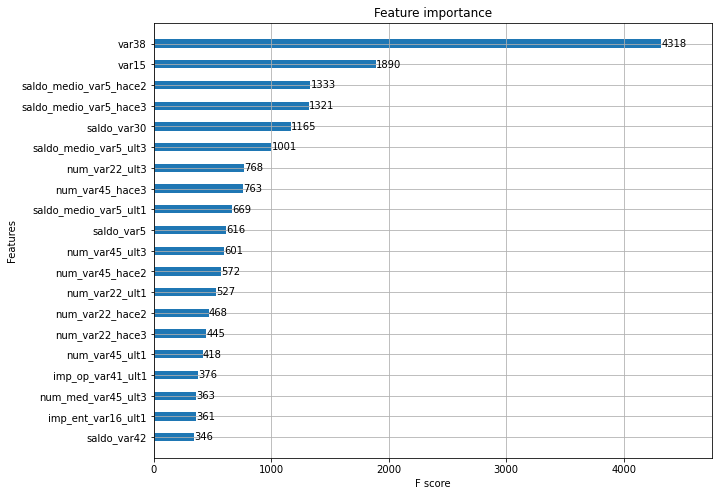

In [12]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = 0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [13]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

In [14]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	val

[23]	valid_0's auc: 0.869182	valid_0's binary_logloss: 0.126269	valid_1's auc: 0.836587	valid_1's binary_logloss: 0.140588
[24]	valid_0's auc: 0.869979	valid_0's binary_logloss: 0.125886	valid_1's auc: 0.836766	valid_1's binary_logloss: 0.140496
[25]	valid_0's auc: 0.870956	valid_0's binary_logloss: 0.125545	valid_1's auc: 0.837001	valid_1's binary_logloss: 0.140322
[26]	valid_0's auc: 0.872886	valid_0's binary_logloss: 0.125108	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.140274
[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc: 0.875129	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.837012	valid_1's binary_logloss: 0.140143
[29]	valid_0's auc: 0.875873	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.836866	valid_1's binary_logloss: 0.140163
[30]	valid_0's auc: 0.876465	valid_0's binary_logloss: 0.123865	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.140195
[31]	valid_0's au

[22]	valid_0's auc: 0.869367	valid_0's binary_logloss: 0.126428	valid_1's auc: 0.839045	valid_1's binary_logloss: 0.140242
[23]	valid_0's auc: 0.870018	valid_0's binary_logloss: 0.126051	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.140113
[24]	valid_0's auc: 0.871076	valid_0's binary_logloss: 0.125665	valid_1's auc: 0.838918	valid_1's binary_logloss: 0.139963
[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc: 0.873565	valid_0's binary_logloss: 0.124623	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139786
[28]	valid_0's auc: 0.874397	valid_0's binary_logloss: 0.124307	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139815
[29]	valid_0's auc: 0.87544	valid_0's binary_logloss: 0.124018	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.139819
[30]	valid_0's auc:

[44]	valid_0's auc: 0.888918	valid_0's binary_logloss: 0.119598	valid_1's auc: 0.839591	valid_1's binary_logloss: 0.139427
[45]	valid_0's auc: 0.889615	valid_0's binary_logloss: 0.119335	valid_1's auc: 0.839609	valid_1's binary_logloss: 0.139412
[46]	valid_0's auc: 0.890166	valid_0's binary_logloss: 0.119099	valid_1's auc: 0.839346	valid_1's binary_logloss: 0.139475
[47]	valid_0's auc: 0.890678	valid_0's binary_logloss: 0.118869	valid_1's auc: 0.839761	valid_1's binary_logloss: 0.1394
[48]	valid_0's auc: 0.891058	valid_0's binary_logloss: 0.118665	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139409
[49]	valid_0's auc: 0.891635	valid_0's binary_logloss: 0.118425	valid_1's auc: 0.839754	valid_1's binary_logloss: 0.139428
[50]	valid_0's auc: 0.892346	valid_0's binary_logloss: 0.118168	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.139501
[51]	valid_0's auc: 0.892736	valid_0's binary_logloss: 0.117984	valid_1's auc: 0.839121	valid_1's binary_logloss: 0.139524
[52]	valid_0's auc

[26]	valid_0's auc: 0.872886	valid_0's binary_logloss: 0.125108	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.140274
[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc: 0.875129	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.837012	valid_1's binary_logloss: 0.140143
[29]	valid_0's auc: 0.875873	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.836866	valid_1's binary_logloss: 0.140163
[30]	valid_0's auc: 0.876465	valid_0's binary_logloss: 0.123865	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.140195
[31]	valid_0's auc: 0.877699	valid_0's binary_logloss: 0.123521	valid_1's auc: 0.836229	valid_1's binary_logloss: 0.140186
[32]	valid_0's auc: 0.878492	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.140145
[33]	valid_0's auc: 0.879281	valid_0's binary_logloss: 0.122981	valid_1's auc: 0.836061	valid_1's binary_logloss: 0.140165
[34]	valid_0's au

[23]	valid_0's auc: 0.870018	valid_0's binary_logloss: 0.126051	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.140113
[24]	valid_0's auc: 0.871076	valid_0's binary_logloss: 0.125665	valid_1's auc: 0.838918	valid_1's binary_logloss: 0.139963
[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc: 0.873565	valid_0's binary_logloss: 0.124623	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139786
[28]	valid_0's auc: 0.874397	valid_0's binary_logloss: 0.124307	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139815
[29]	valid_0's auc: 0.87544	valid_0's binary_logloss: 0.124018	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.139819
[30]	valid_0's auc: 0.876222	valid_0's binary_logloss: 0.123733	valid_1's auc: 0.838003	valid_1's binary_logloss: 0.139778
[31]	valid_0's auc:

[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844878	valid_0's binary_logloss: 0.14969	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.159283
[3]	valid_0's auc: 0.848608	valid_0's binary_logloss: 0.145495	valid_1's auc: 0.831668	valid_1's binary_logloss: 0.155726
[4]	valid_0's auc: 0.85412	valid_0's binary_logloss: 0.142244	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.153013
[5]	valid_0's auc: 0.856985	valid_0's binary_logloss: 0.139541	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.150762
[6]	valid_0's auc: 0.860318	valid_0's binary_logloss: 0.137315	valid_1's auc: 0.834439	valid_1's binary_logloss: 0.148891
[7]	valid_0's auc: 0.862354	valid_0's binary_logloss: 0.135314	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.147306
[8]	valid_0's auc: 0.864507	valid_0's binary_logloss: 0.133588	valid_1's auc: 0.834413	

[29]	valid_0's auc: 0.896654	valid_0's binary_logloss: 0.116949	valid_1's auc: 0.833704	valid_1's binary_logloss: 0.140719
[30]	valid_0's auc: 0.897948	valid_0's binary_logloss: 0.116488	valid_1's auc: 0.834036	valid_1's binary_logloss: 0.140635
[31]	valid_0's auc: 0.898781	valid_0's binary_logloss: 0.116069	valid_1's auc: 0.834036	valid_1's binary_logloss: 0.140671
[32]	valid_0's auc: 0.90009	valid_0's binary_logloss: 0.115625	valid_1's auc: 0.83384	valid_1's binary_logloss: 0.140667
[33]	valid_0's auc: 0.901073	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.833911	valid_1's binary_logloss: 0.140619
[34]	valid_0's auc: 0.902228	valid_0's binary_logloss: 0.114803	valid_1's auc: 0.834049	valid_1's binary_logloss: 0.140595
[35]	valid_0's auc: 0.902949	valid_0's binary_logloss: 0.114411	valid_1's auc: 0.833465	valid_1's binary_logloss: 0.140641
[36]	valid_0's auc: 0.90428	valid_0's binary_logloss: 0.114027	valid_1's auc: 0.833146	valid_1's binary_logloss: 0.140714
[37]	valid_0's auc:

[19]	valid_0's auc: 0.882715	valid_0's binary_logloss: 0.12297	valid_1's auc: 0.839997	valid_1's binary_logloss: 0.140537
[20]	valid_0's auc: 0.884031	valid_0's binary_logloss: 0.122325	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.140381
[21]	valid_0's auc: 0.885764	valid_0's binary_logloss: 0.121625	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.140197
[22]	valid_0's auc: 0.887281	valid_0's binary_logloss: 0.120983	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.140102
[23]	valid_0's auc: 0.888433	valid_0's binary_logloss: 0.120453	valid_1's auc: 0.838981	valid_1's binary_logloss: 0.140039
[24]	valid_0's auc: 0.890216	valid_0's binary_logloss: 0.119857	valid_1's auc: 0.839006	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.891521	valid_0's binary_logloss: 0.119298	valid_1's auc: 0.83887	valid_1's binary_logloss: 0.139884
[26]	valid_0's auc: 0.892429	valid_0's binary_logloss: 0.118862	valid_1's auc: 0.838468	valid_1's binary_logloss: 0.139871
[27]	valid_0's auc

[45]	valid_0's auc: 0.912055	valid_0's binary_logloss: 0.110372	valid_1's auc: 0.839536	valid_1's binary_logloss: 0.139546
[46]	valid_0's auc: 0.912574	valid_0's binary_logloss: 0.110057	valid_1's auc: 0.83948	valid_1's binary_logloss: 0.139584
[47]	valid_0's auc: 0.91302	valid_0's binary_logloss: 0.109723	valid_1's auc: 0.839228	valid_1's binary_logloss: 0.139685
[48]	valid_0's auc: 0.913378	valid_0's binary_logloss: 0.109457	valid_1's auc: 0.839315	valid_1's binary_logloss: 0.139695
Early stopping, best iteration is:
[18]	valid_0's auc: 0.884494	valid_0's binary_logloss: 0.122936	valid_1's auc: 0.841739	valid_1's binary_logloss: 0.140193
[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844878	valid_0's binary_logloss: 0.14969	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.159283
[3]	valid_0's auc: 0.848608	valid_0's binary_log

[17]	valid_0's auc: 0.880532	valid_0's binary_logloss: 0.124054	valid_1's auc: 0.833893	valid_1's binary_logloss: 0.141884
[18]	valid_0's auc: 0.882045	valid_0's binary_logloss: 0.123344	valid_1's auc: 0.833575	valid_1's binary_logloss: 0.141697
[19]	valid_0's auc: 0.883566	valid_0's binary_logloss: 0.122594	valid_1's auc: 0.832707	valid_1's binary_logloss: 0.141615
[20]	valid_0's auc: 0.885585	valid_0's binary_logloss: 0.121869	valid_1's auc: 0.833151	valid_1's binary_logloss: 0.141426
[21]	valid_0's auc: 0.887553	valid_0's binary_logloss: 0.121164	valid_1's auc: 0.834052	valid_1's binary_logloss: 0.141225
[22]	valid_0's auc: 0.88866	valid_0's binary_logloss: 0.120577	valid_1's auc: 0.834098	valid_1's binary_logloss: 0.141029
[23]	valid_0's auc: 0.889845	valid_0's binary_logloss: 0.11997	valid_1's auc: 0.833894	valid_1's binary_logloss: 0.140951
[24]	valid_0's auc: 0.890796	valid_0's binary_logloss: 0.119485	valid_1's auc: 0.83469	valid_1's binary_logloss: 0.140844
[25]	valid_0's auc:

[17]	valid_0's auc: 0.88003	valid_0's binary_logloss: 0.124299	valid_1's auc: 0.840327	valid_1's binary_logloss: 0.140902
[18]	valid_0's auc: 0.881171	valid_0's binary_logloss: 0.123613	valid_1's auc: 0.839956	valid_1's binary_logloss: 0.14074
[19]	valid_0's auc: 0.882715	valid_0's binary_logloss: 0.12297	valid_1's auc: 0.839997	valid_1's binary_logloss: 0.140537
[20]	valid_0's auc: 0.884031	valid_0's binary_logloss: 0.122325	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.140381
[21]	valid_0's auc: 0.885764	valid_0's binary_logloss: 0.121625	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.140197
[22]	valid_0's auc: 0.887281	valid_0's binary_logloss: 0.120983	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.140102
[23]	valid_0's auc: 0.888433	valid_0's binary_logloss: 0.120453	valid_1's auc: 0.838981	valid_1's binary_logloss: 0.140039
[24]	valid_0's auc: 0.890216	valid_0's binary_logloss: 0.119857	valid_1's auc: 0.839006	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc:

[48]	valid_0's auc: 0.913378	valid_0's binary_logloss: 0.109457	valid_1's auc: 0.839315	valid_1's binary_logloss: 0.139695
Early stopping, best iteration is:
[18]	valid_0's auc: 0.884494	valid_0's binary_logloss: 0.122936	valid_1's auc: 0.841739	valid_1's binary_logloss: 0.140193
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829817	valid_0's binary_logloss: 0.151021	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.159697
[3]	valid_0's auc: 0.835232	valid_0's binary_logloss: 0.147177	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.156048
[4]	valid_0's auc: 0.83968	valid_0's binary_logloss: 0.144169	valid_1's auc: 0.829988	valid_1's binary_logloss: 0.15317
[5]	valid_0's auc: 0.842369	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832821	valid_1's binary_logloss: 0.150835
[6]	valid_0's auc: 0.845358	valid_0's binary_loglos

[21]	valid_0's auc: 0.866373	valid_0's binary_logloss: 0.127496	valid_1's auc: 0.838239	valid_1's binary_logloss: 0.140637
[22]	valid_0's auc: 0.867435	valid_0's binary_logloss: 0.12708	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.1406
[23]	valid_0's auc: 0.868304	valid_0's binary_logloss: 0.12669	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140434
[24]	valid_0's auc: 0.869271	valid_0's binary_logloss: 0.126307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.140281
[25]	valid_0's auc: 0.870212	valid_0's binary_logloss: 0.125949	valid_1's auc: 0.837555	valid_1's binary_logloss: 0.14025
[26]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.125636	valid_1's auc: 0.837504	valid_1's binary_logloss: 0.140165
[27]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.140044
[28]	valid_0's auc: 0.874041	valid_0's binary_logloss: 0.124866	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.14003
[29]	valid_0's auc: 0.

[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.83905

[27]	valid_0's auc: 0.873488	valid_0's binary_logloss: 0.125055	valid_1's auc: 0.842803	valid_1's binary_logloss: 0.138866
[28]	valid_0's auc: 0.874282	valid_0's binary_logloss: 0.124763	valid_1's auc: 0.842697	valid_1's binary_logloss: 0.138796
[29]	valid_0's auc: 0.875185	valid_0's binary_logloss: 0.124481	valid_1's auc: 0.843506	valid_1's binary_logloss: 0.138625
[30]	valid_0's auc: 0.875805	valid_0's binary_logloss: 0.124216	valid_1's auc: 0.843564	valid_1's binary_logloss: 0.138532
[31]	valid_0's auc: 0.877289	valid_0's binary_logloss: 0.123898	valid_1's auc: 0.84385	valid_1's binary_logloss: 0.138455
[32]	valid_0's auc: 0.878137	valid_0's binary_logloss: 0.123613	valid_1's auc: 0.843943	valid_1's binary_logloss: 0.138401
[33]	valid_0's auc: 0.879141	valid_0's binary_logloss: 0.123349	valid_1's auc: 0.843945	valid_1's binary_logloss: 0.13837
[34]	valid_0's auc: 0.879829	valid_0's binary_logloss: 0.123074	valid_1's auc: 0.844035	valid_1's binary_logloss: 0.13828
[35]	valid_0's auc:

[22]	valid_0's auc: 0.868689	valid_0's binary_logloss: 0.126832	valid_1's auc: 0.837975	valid_1's binary_logloss: 0.139969
[23]	valid_0's auc: 0.869773	valid_0's binary_logloss: 0.126451	valid_1's auc: 0.837722	valid_1's binary_logloss: 0.139931
[24]	valid_0's auc: 0.871205	valid_0's binary_logloss: 0.12605	valid_1's auc: 0.837453	valid_1's binary_logloss: 0.139824
[25]	valid_0's auc: 0.871806	valid_0's binary_logloss: 0.125728	valid_1's auc: 0.837283	valid_1's binary_logloss: 0.13976
[26]	valid_0's auc: 0.873412	valid_0's binary_logloss: 0.125313	valid_1's auc: 0.836946	valid_1's binary_logloss: 0.139742
[27]	valid_0's auc: 0.874137	valid_0's binary_logloss: 0.124988	valid_1's auc: 0.836586	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874911	valid_0's binary_logloss: 0.124675	valid_1's auc: 0.836489	valid_1's binary_logloss: 0.139742
[29]	valid_0's auc: 0.875538	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.836554	valid_1's binary_logloss: 0.139712
[30]	valid_0's auc

[26]	valid_0's auc: 0.871934	valid_0's binary_logloss: 0.12537	valid_1's auc: 0.838594	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873048	valid_0's binary_logloss: 0.125049	valid_1's auc: 0.83847	valid_1's binary_logloss: 0.139655
[28]	valid_0's auc: 0.873824	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.838229	valid_1's binary_logloss: 0.139655
[29]	valid_0's auc: 0.874662	valid_0's binary_logloss: 0.124467	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139579
[30]	valid_0's auc: 0.87542	valid_0's binary_logloss: 0.124168	valid_1's auc: 0.838156	valid_1's binary_logloss: 0.139548
[31]	valid_0's auc: 0.876207	valid_0's binary_logloss: 0.123915	valid_1's auc: 0.838237	valid_1's binary_logloss: 0.139538
[32]	valid_0's auc: 0.877156	valid_0's binary_logloss: 0.123623	valid_1's auc: 0.838271	valid_1's binary_logloss: 0.13947
[33]	valid_0's auc: 0.87768	valid_0's binary_logloss: 0.12338	valid_1's auc: 0.838713	valid_1's binary_logloss: 0.139346
[34]	valid_0's auc: 0.

[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	val

[72]	valid_0's auc: 0.89933	valid_0's binary_logloss: 0.11544	valid_1's auc: 0.843123	valid_1's binary_logloss: 0.138587
[73]	valid_0's auc: 0.899665	valid_0's binary_logloss: 0.115279	valid_1's auc: 0.843158	valid_1's binary_logloss: 0.138606
[74]	valid_0's auc: 0.899872	valid_0's binary_logloss: 0.115145	valid_1's auc: 0.843153	valid_1's binary_logloss: 0.138622
[75]	valid_0's auc: 0.900318	valid_0's binary_logloss: 0.115012	valid_1's auc: 0.8431	valid_1's binary_logloss: 0.138652
[76]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.114797	valid_1's auc: 0.843128	valid_1's binary_logloss: 0.138654
[77]	valid_0's auc: 0.901053	valid_0's binary_logloss: 0.11465	valid_1's auc: 0.843183	valid_1's binary_logloss: 0.138667
[78]	valid_0's auc: 0.901334	valid_0's binary_logloss: 0.114492	valid_1's auc: 0.843036	valid_1's binary_logloss: 0.138728
Early stopping, best iteration is:
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logl

[18]	valid_0's auc: 0.880697	valid_0's binary_logloss: 0.124485	valid_1's auc: 0.834855	valid_1's binary_logloss: 0.141381
[19]	valid_0's auc: 0.881751	valid_0's binary_logloss: 0.123851	valid_1's auc: 0.83548	valid_1's binary_logloss: 0.141089
[20]	valid_0's auc: 0.883208	valid_0's binary_logloss: 0.123231	valid_1's auc: 0.834617	valid_1's binary_logloss: 0.141074
[21]	valid_0's auc: 0.884441	valid_0's binary_logloss: 0.122672	valid_1's auc: 0.835086	valid_1's binary_logloss: 0.140871
[22]	valid_0's auc: 0.885795	valid_0's binary_logloss: 0.122047	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.140833
[23]	valid_0's auc: 0.88703	valid_0's binary_logloss: 0.121437	valid_1's auc: 0.834867	valid_1's binary_logloss: 0.14067
[24]	valid_0's auc: 0.888628	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.834703	valid_1's binary_logloss: 0.140607
[25]	valid_0's auc: 0.889539	valid_0's binary_logloss: 0.120354	valid_1's auc: 0.834234	valid_1's binary_logloss: 0.140572
[26]	valid_0's auc:

[17]	valid_0's auc: 0.87671	valid_0's binary_logloss: 0.125734	valid_1's auc: 0.838859	valid_1's binary_logloss: 0.140993
[18]	valid_0's auc: 0.877745	valid_0's binary_logloss: 0.12506	valid_1's auc: 0.838826	valid_1's binary_logloss: 0.140774
[19]	valid_0's auc: 0.87955	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.838685	valid_1's binary_logloss: 0.14062
[20]	valid_0's auc: 0.88095	valid_0's binary_logloss: 0.123758	valid_1's auc: 0.839472	valid_1's binary_logloss: 0.140278
[21]	valid_0's auc: 0.882333	valid_0's binary_logloss: 0.123172	valid_1's auc: 0.839953	valid_1's binary_logloss: 0.139987
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[23]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.122106	valid_1's auc: 0.840085	valid_1's binary_logloss: 0.139652
[24]	valid_0's auc: 0.886267	valid_0's binary_logloss: 0.121544	valid_1's auc: 0.839519	valid_1's binary_logloss: 0.13967
[25]	valid_0's auc: 0.

[44]	valid_0's auc: 0.907269	valid_0's binary_logloss: 0.112432	valid_1's auc: 0.839357	valid_1's binary_logloss: 0.139519
[45]	valid_0's auc: 0.907761	valid_0's binary_logloss: 0.112094	valid_1's auc: 0.839145	valid_1's binary_logloss: 0.139503
[46]	valid_0's auc: 0.908229	valid_0's binary_logloss: 0.111774	valid_1's auc: 0.839064	valid_1's binary_logloss: 0.139515
[47]	valid_0's auc: 0.908961	valid_0's binary_logloss: 0.111399	valid_1's auc: 0.838752	valid_1's binary_logloss: 0.139561
[48]	valid_0's auc: 0.909623	valid_0's binary_logloss: 0.111156	valid_1's auc: 0.838658	valid_1's binary_logloss: 0.139589
[49]	valid_0's auc: 0.910075	valid_0's binary_logloss: 0.110845	valid_1's auc: 0.838588	valid_1's binary_logloss: 0.13959
[50]	valid_0's auc: 0.910737	valid_0's binary_logloss: 0.110566	valid_1's auc: 0.838609	valid_1's binary_logloss: 0.139608
[51]	valid_0's auc: 0.911115	valid_0's binary_logloss: 0.110282	valid_1's auc: 0.838459	valid_1's binary_logloss: 0.139669
[52]	valid_0's au

[39]	valid_0's auc: 0.90309	valid_0's binary_logloss: 0.114499	valid_1's auc: 0.832257	valid_1's binary_logloss: 0.140399
Early stopping, best iteration is:
[9]	valid_0's auc: 0.866024	valid_0's binary_logloss: 0.132932	valid_1's auc: 0.836913	valid_1's binary_logloss: 0.145234
[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848339	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.829756	valid_1's binary_logloss: 0.156122
[4]	valid_0's auc: 0.852327	valid_0's binary_logloss: 0.142785	valid_1's auc: 0.83262	valid_1's binary_logloss: 0.153215
[5]	valid_0's auc: 0.856991	valid_0's binary_logloss: 0.140075	valid_1's auc: 0.83528	valid_1's binary_logloss: 0.150936
[6]	valid_0's auc: 0.860123	valid_0's binary_logloss:

[33]	valid_0's auc: 0.898332	valid_0's binary_logloss: 0.116584	valid_1's auc: 0.836498	valid_1's binary_logloss: 0.139828
[34]	valid_0's auc: 0.899324	valid_0's binary_logloss: 0.116129	valid_1's auc: 0.836499	valid_1's binary_logloss: 0.139874
[35]	valid_0's auc: 0.900175	valid_0's binary_logloss: 0.11578	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.139924
[36]	valid_0's auc: 0.901261	valid_0's binary_logloss: 0.115448	valid_1's auc: 0.835902	valid_1's binary_logloss: 0.13999
[37]	valid_0's auc: 0.901964	valid_0's binary_logloss: 0.115083	valid_1's auc: 0.835674	valid_1's binary_logloss: 0.14012
[38]	valid_0's auc: 0.902511	valid_0's binary_logloss: 0.114769	valid_1's auc: 0.835307	valid_1's binary_logloss: 0.140207
Early stopping, best iteration is:
[8]	valid_0's auc: 0.863565	valid_0's binary_logloss: 0.134173	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.145898
[1]	valid_0's auc: 0.831709	valid_0's binary_logloss: 0.155602	valid_1's auc: 0.817142	valid_1's binary_logl

[21]	valid_0's auc: 0.88529	valid_0's binary_logloss: 0.122327	valid_1's auc: 0.838792	valid_1's binary_logloss: 0.140098
[22]	valid_0's auc: 0.88648	valid_0's binary_logloss: 0.121732	valid_1's auc: 0.838403	valid_1's binary_logloss: 0.139974
[23]	valid_0's auc: 0.887765	valid_0's binary_logloss: 0.121176	valid_1's auc: 0.838404	valid_1's binary_logloss: 0.139891
[24]	valid_0's auc: 0.888887	valid_0's binary_logloss: 0.120591	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.890044	valid_0's binary_logloss: 0.120074	valid_1's auc: 0.838114	valid_1's binary_logloss: 0.139883
[26]	valid_0's auc: 0.891051	valid_0's binary_logloss: 0.119588	valid_1's auc: 0.838544	valid_1's binary_logloss: 0.139784
[27]	valid_0's auc: 0.892157	valid_0's binary_logloss: 0.119094	valid_1's auc: 0.838348	valid_1's binary_logloss: 0.139788
[28]	valid_0's auc: 0.893116	valid_0's binary_logloss: 0.118639	valid_1's auc: 0.838654	valid_1's binary_logloss: 0.139723
[29]	valid_0's auc

[22]	valid_0's auc: 0.869333	valid_0's binary_logloss: 0.126397	valid_1's auc: 0.838291	valid_1's binary_logloss: 0.139941
[23]	valid_0's auc: 0.870664	valid_0's binary_logloss: 0.125953	valid_1's auc: 0.837637	valid_1's binary_logloss: 0.139916
[24]	valid_0's auc: 0.871541	valid_0's binary_logloss: 0.125585	valid_1's auc: 0.837144	valid_1's binary_logloss: 0.139915
[25]	valid_0's auc: 0.872827	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837438	valid_1's binary_logloss: 0.139775
[26]	valid_0's auc: 0.873522	valid_0's binary_logloss: 0.12487	valid_1's auc: 0.83729	valid_1's binary_logloss: 0.139751
[27]	valid_0's auc: 0.874428	valid_0's binary_logloss: 0.124521	valid_1's auc: 0.837295	valid_1's binary_logloss: 0.139667
[28]	valid_0's auc: 0.875453	valid_0's binary_logloss: 0.124204	valid_1's auc: 0.836916	valid_1's binary_logloss: 0.139693
[29]	valid_0's auc: 0.876968	valid_0's binary_logloss: 0.123851	valid_1's auc: 0.836543	valid_1's binary_logloss: 0.139692
[30]	valid_0's auc

[23]	valid_0's auc: 0.869587	valid_0's binary_logloss: 0.125905	valid_1's auc: 0.83825	valid_1's binary_logloss: 0.139909
[24]	valid_0's auc: 0.870532	valid_0's binary_logloss: 0.125527	valid_1's auc: 0.838429	valid_1's binary_logloss: 0.139818
[25]	valid_0's auc: 0.871628	valid_0's binary_logloss: 0.125118	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139768
[26]	valid_0's auc: 0.872816	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.838203	valid_1's binary_logloss: 0.139683
[27]	valid_0's auc: 0.873647	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837808	valid_1's binary_logloss: 0.139669
[28]	valid_0's auc: 0.874326	valid_0's binary_logloss: 0.124117	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.139635
[29]	valid_0's auc: 0.875069	valid_0's binary_logloss: 0.123826	valid_1's auc: 0.838037	valid_1's binary_logloss: 0.139565
[30]	valid_0's auc: 0.876092	valid_0's binary_logloss: 0.123541	valid_1's auc: 0.838013	valid_1's binary_logloss: 0.139571
[31]	valid_0's auc

[22]	valid_0's auc: 0.870971	valid_0's binary_logloss: 0.126075	valid_1's auc: 0.840789	valid_1's binary_logloss: 0.140251
[23]	valid_0's auc: 0.872384	valid_0's binary_logloss: 0.125599	valid_1's auc: 0.840267	valid_1's binary_logloss: 0.14022
[24]	valid_0's auc: 0.873433	valid_0's binary_logloss: 0.125215	valid_1's auc: 0.840763	valid_1's binary_logloss: 0.140023
[25]	valid_0's auc: 0.874094	valid_0's binary_logloss: 0.124834	valid_1's auc: 0.840782	valid_1's binary_logloss: 0.139927
[26]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.12446	valid_1's auc: 0.840852	valid_1's binary_logloss: 0.139864
[27]	valid_0's auc: 0.875863	valid_0's binary_logloss: 0.124178	valid_1's auc: 0.840905	valid_1's binary_logloss: 0.139751
[28]	valid_0's auc: 0.876477	valid_0's binary_logloss: 0.123899	valid_1's auc: 0.840828	valid_1's binary_logloss: 0.139688
[29]	valid_0's auc: 0.877436	valid_0's binary_logloss: 0.123585	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.139596
[30]	valid_0's auc

[29]	valid_0's auc: 0.876968	valid_0's binary_logloss: 0.123851	valid_1's auc: 0.836543	valid_1's binary_logloss: 0.139692
[30]	valid_0's auc: 0.878211	valid_0's binary_logloss: 0.123513	valid_1's auc: 0.836768	valid_1's binary_logloss: 0.139653
[31]	valid_0's auc: 0.879123	valid_0's binary_logloss: 0.123238	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.139687
[32]	valid_0's auc: 0.879609	valid_0's binary_logloss: 0.122982	valid_1's auc: 0.836481	valid_1's binary_logloss: 0.139632
[33]	valid_0's auc: 0.880297	valid_0's binary_logloss: 0.122728	valid_1's auc: 0.8369	valid_1's binary_logloss: 0.139575
[34]	valid_0's auc: 0.881002	valid_0's binary_logloss: 0.122492	valid_1's auc: 0.836762	valid_1's binary_logloss: 0.139536
[35]	valid_0's auc: 0.881621	valid_0's binary_logloss: 0.122231	valid_1's auc: 0.836948	valid_1's binary_logloss: 0.139471
[36]	valid_0's auc: 0.882178	valid_0's binary_logloss: 0.121993	valid_1's auc: 0.83713	valid_1's binary_logloss: 0.139418
[37]	valid_0's auc:

[26]	valid_0's auc: 0.872816	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.838203	valid_1's binary_logloss: 0.139683
[27]	valid_0's auc: 0.873647	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837808	valid_1's binary_logloss: 0.139669
[28]	valid_0's auc: 0.874326	valid_0's binary_logloss: 0.124117	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.139635
[29]	valid_0's auc: 0.875069	valid_0's binary_logloss: 0.123826	valid_1's auc: 0.838037	valid_1's binary_logloss: 0.139565
[30]	valid_0's auc: 0.876092	valid_0's binary_logloss: 0.123541	valid_1's auc: 0.838013	valid_1's binary_logloss: 0.139571
[31]	valid_0's auc: 0.877253	valid_0's binary_logloss: 0.123222	valid_1's auc: 0.838176	valid_1's binary_logloss: 0.139525
[32]	valid_0's auc: 0.877859	valid_0's binary_logloss: 0.122952	valid_1's auc: 0.837999	valid_1's binary_logloss: 0.139539
[33]	valid_0's auc: 0.878881	valid_0's binary_logloss: 0.122669	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.139429
[34]	valid_0's au

[27]	valid_0's auc: 0.875863	valid_0's binary_logloss: 0.124178	valid_1's auc: 0.840905	valid_1's binary_logloss: 0.139751
[28]	valid_0's auc: 0.876477	valid_0's binary_logloss: 0.123899	valid_1's auc: 0.840828	valid_1's binary_logloss: 0.139688
[29]	valid_0's auc: 0.877436	valid_0's binary_logloss: 0.123585	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.139596
[30]	valid_0's auc: 0.878569	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.139479
[31]	valid_0's auc: 0.879246	valid_0's binary_logloss: 0.122979	valid_1's auc: 0.840819	valid_1's binary_logloss: 0.139442
[32]	valid_0's auc: 0.880496	valid_0's binary_logloss: 0.122664	valid_1's auc: 0.840531	valid_1's binary_logloss: 0.139452
[33]	valid_0's auc: 0.881439	valid_0's binary_logloss: 0.122371	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.139455
[34]	valid_0's auc: 0.882347	valid_0's binary_logloss: 0.122119	valid_1's auc: 0.840374	valid_1's binary_logloss: 0.139423
[35]	valid_0's a

[37]	valid_0's auc: 0.903583	valid_0's binary_logloss: 0.113893	valid_1's auc: 0.836319	valid_1's binary_logloss: 0.139831
[38]	valid_0's auc: 0.904289	valid_0's binary_logloss: 0.113536	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139874
[39]	valid_0's auc: 0.904948	valid_0's binary_logloss: 0.113207	valid_1's auc: 0.835797	valid_1's binary_logloss: 0.139959
[40]	valid_0's auc: 0.905808	valid_0's binary_logloss: 0.112811	valid_1's auc: 0.835879	valid_1's binary_logloss: 0.139967
[41]	valid_0's auc: 0.906507	valid_0's binary_logloss: 0.112548	valid_1's auc: 0.835793	valid_1's binary_logloss: 0.139996
[42]	valid_0's auc: 0.907263	valid_0's binary_logloss: 0.112199	valid_1's auc: 0.835583	valid_1's binary_logloss: 0.140069
[43]	valid_0's auc: 0.907622	valid_0's binary_logloss: 0.111883	valid_1's auc: 0.835374	valid_1's binary_logloss: 0.140122
[44]	valid_0's auc: 0.908342	valid_0's binary_logloss: 0.111608	valid_1's auc: 0.835053	valid_1's binary_logloss: 0.140227
[45]	valid_0's a

[19]	valid_0's auc: 0.884204	valid_0's binary_logloss: 0.122205	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.140094
[20]	valid_0's auc: 0.88564	valid_0's binary_logloss: 0.121562	valid_1's auc: 0.836976	valid_1's binary_logloss: 0.139982
[21]	valid_0's auc: 0.886788	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.83734	valid_1's binary_logloss: 0.139793
[22]	valid_0's auc: 0.888424	valid_0's binary_logloss: 0.120314	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.139623
[23]	valid_0's auc: 0.889756	valid_0's binary_logloss: 0.119797	valid_1's auc: 0.837015	valid_1's binary_logloss: 0.139653
[24]	valid_0's auc: 0.891304	valid_0's binary_logloss: 0.119202	valid_1's auc: 0.837202	valid_1's binary_logloss: 0.139584
[25]	valid_0's auc: 0.892545	valid_0's binary_logloss: 0.118664	valid_1's auc: 0.837268	valid_1's binary_logloss: 0.1395
[26]	valid_0's auc: 0.893944	valid_0's binary_logloss: 0.118169	valid_1's auc: 0.837371	valid_1's binary_logloss: 0.139458
[27]	valid_0's auc: 0

[1]	valid_0's auc: 0.833594	valid_0's binary_logloss: 0.155635	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846048	valid_0's binary_logloss: 0.149713	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.159607
[3]	valid_0's auc: 0.849539	valid_0's binary_logloss: 0.145369	valid_1's auc: 0.833531	valid_1's binary_logloss: 0.155847
[4]	valid_0's auc: 0.8529	valid_0's binary_logloss: 0.142095	valid_1's auc: 0.832813	valid_1's binary_logloss: 0.15325
[5]	valid_0's auc: 0.855497	valid_0's binary_logloss: 0.13934	valid_1's auc: 0.833555	valid_1's binary_logloss: 0.150958
[6]	valid_0's auc: 0.860603	valid_0's binary_logloss: 0.13707	valid_1's auc: 0.836476	valid_1's binary_logloss: 0.149037
[7]	valid_0's auc: 0.86401	valid_0's binary_logloss: 0.13507	valid_1's auc: 0.838639	valid_1's binary_logloss: 0.147363
[8]	valid_0's auc: 0.866327	valid_0's binary_logloss: 0.133353	valid_1's auc: 0.83917	valid_

[26]	valid_0's auc: 0.892936	valid_0's binary_logloss: 0.118515	valid_1's auc: 0.836466	valid_1's binary_logloss: 0.14011
[27]	valid_0's auc: 0.894014	valid_0's binary_logloss: 0.118046	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.140163
[28]	valid_0's auc: 0.895806	valid_0's binary_logloss: 0.1175	valid_1's auc: 0.835987	valid_1's binary_logloss: 0.1401
[29]	valid_0's auc: 0.896704	valid_0's binary_logloss: 0.117069	valid_1's auc: 0.83623	valid_1's binary_logloss: 0.140035
[30]	valid_0's auc: 0.897739	valid_0's binary_logloss: 0.116577	valid_1's auc: 0.836709	valid_1's binary_logloss: 0.139877
[31]	valid_0's auc: 0.898365	valid_0's binary_logloss: 0.116187	valid_1's auc: 0.836258	valid_1's binary_logloss: 0.139893
[32]	valid_0's auc: 0.899428	valid_0's binary_logloss: 0.115755	valid_1's auc: 0.836228	valid_1's binary_logloss: 0.139825
[33]	valid_0's auc: 0.900129	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.836132	valid_1's binary_logloss: 0.139815
[34]	valid_0's auc: 0.

[13]	valid_0's auc: 0.874758	valid_0's binary_logloss: 0.127141	valid_1's auc: 0.837972	valid_1's binary_logloss: 0.141744
[14]	valid_0's auc: 0.876311	valid_0's binary_logloss: 0.126137	valid_1's auc: 0.837484	valid_1's binary_logloss: 0.141408
[15]	valid_0's auc: 0.877968	valid_0's binary_logloss: 0.12525	valid_1's auc: 0.836581	valid_1's binary_logloss: 0.141099
[16]	valid_0's auc: 0.87963	valid_0's binary_logloss: 0.124439	valid_1's auc: 0.836006	valid_1's binary_logloss: 0.140886
[17]	valid_0's auc: 0.881659	valid_0's binary_logloss: 0.123628	valid_1's auc: 0.835985	valid_1's binary_logloss: 0.140605
[18]	valid_0's auc: 0.882607	valid_0's binary_logloss: 0.122935	valid_1's auc: 0.836156	valid_1's binary_logloss: 0.140354
[19]	valid_0's auc: 0.884204	valid_0's binary_logloss: 0.122205	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.140094
[20]	valid_0's auc: 0.88564	valid_0's binary_logloss: 0.121562	valid_1's auc: 0.836976	valid_1's binary_logloss: 0.139982
[21]	valid_0's auc:

[41]	valid_0's auc: 0.907126	valid_0's binary_logloss: 0.112589	valid_1's auc: 0.836763	valid_1's binary_logloss: 0.139978
[42]	valid_0's auc: 0.907766	valid_0's binary_logloss: 0.112228	valid_1's auc: 0.836668	valid_1's binary_logloss: 0.140037
[43]	valid_0's auc: 0.908476	valid_0's binary_logloss: 0.111878	valid_1's auc: 0.836706	valid_1's binary_logloss: 0.140074
[44]	valid_0's auc: 0.908965	valid_0's binary_logloss: 0.111555	valid_1's auc: 0.836825	valid_1's binary_logloss: 0.140052
[45]	valid_0's auc: 0.90954	valid_0's binary_logloss: 0.111283	valid_1's auc: 0.836509	valid_1's binary_logloss: 0.140134
[46]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.111029	valid_1's auc: 0.836531	valid_1's binary_logloss: 0.140137
[47]	valid_0's auc: 0.910771	valid_0's binary_logloss: 0.110662	valid_1's auc: 0.836357	valid_1's binary_logloss: 0.140222
Early stopping, best iteration is:
[17]	valid_0's auc: 0.88003	valid_0's binary_logloss: 0.124299	valid_1's auc: 0.840327	valid_1's binary_l

[21]	valid_0's auc: 0.867294	valid_0's binary_logloss: 0.127271	valid_1's auc: 0.838068	valid_1's binary_logloss: 0.140114
[22]	valid_0's auc: 0.868689	valid_0's binary_logloss: 0.126832	valid_1's auc: 0.837975	valid_1's binary_logloss: 0.139969
[23]	valid_0's auc: 0.869773	valid_0's binary_logloss: 0.126451	valid_1's auc: 0.837722	valid_1's binary_logloss: 0.139931
[24]	valid_0's auc: 0.871205	valid_0's binary_logloss: 0.12605	valid_1's auc: 0.837453	valid_1's binary_logloss: 0.139824
[25]	valid_0's auc: 0.871806	valid_0's binary_logloss: 0.125728	valid_1's auc: 0.837283	valid_1's binary_logloss: 0.13976
[26]	valid_0's auc: 0.873412	valid_0's binary_logloss: 0.125313	valid_1's auc: 0.836946	valid_1's binary_logloss: 0.139742
[27]	valid_0's auc: 0.874137	valid_0's binary_logloss: 0.124988	valid_1's auc: 0.836586	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874911	valid_0's binary_logloss: 0.124675	valid_1's auc: 0.836489	valid_1's binary_logloss: 0.139742
[29]	valid_0's auc

[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_logloss: 0.144237	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.153364
[5]	valid_0's auc: 0.845178	valid_0's binary_logloss: 0.141851	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.151017
[6]	valid_0's auc: 0.846202	valid_0's binary_logloss: 0.139881	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149202
[7]	valid_0's auc: 0.849501	valid_0's binary_logloss: 0.13816	valid_1's auc: 0.838439	valid_1's binary_logloss: 0.147646
[8]	valid_0's auc: 0.850898	valid_0's binary_logloss: 0.136639	valid_1's auc: 0.838862	

[22]	valid_0's auc: 0.867081	valid_0's binary_logloss: 0.12726	valid_1's auc: 0.840315	valid_1's binary_logloss: 0.139758
[23]	valid_0's auc: 0.867656	valid_0's binary_logloss: 0.126888	valid_1's auc: 0.839878	valid_1's binary_logloss: 0.139751
[24]	valid_0's auc: 0.868511	valid_0's binary_logloss: 0.12652	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.13964
[25]	valid_0's auc: 0.869233	valid_0's binary_logloss: 0.126158	valid_1's auc: 0.840131	valid_1's binary_logloss: 0.139495
[26]	valid_0's auc: 0.870146	valid_0's binary_logloss: 0.12583	valid_1's auc: 0.839809	valid_1's binary_logloss: 0.139487
[27]	valid_0's auc: 0.871289	valid_0's binary_logloss: 0.125495	valid_1's auc: 0.83977	valid_1's binary_logloss: 0.139452
[28]	valid_0's auc: 0.872449	valid_0's binary_logloss: 0.125203	valid_1's auc: 0.839707	valid_1's binary_logloss: 0.139417
[29]	valid_0's auc: 0.87307	valid_0's binary_logloss: 0.124902	valid_1's auc: 0.840062	valid_1's binary_logloss: 0.13934
[30]	valid_0's auc: 0.8

[50]	valid_0's auc: 0.89018	valid_0's binary_logloss: 0.119358	valid_1's auc: 0.844336	valid_1's binary_logloss: 0.138021
[51]	valid_0's auc: 0.890603	valid_0's binary_logloss: 0.119182	valid_1's auc: 0.84438	valid_1's binary_logloss: 0.138019
[52]	valid_0's auc: 0.891517	valid_0's binary_logloss: 0.118924	valid_1's auc: 0.844393	valid_1's binary_logloss: 0.13803
[53]	valid_0's auc: 0.891938	valid_0's binary_logloss: 0.118749	valid_1's auc: 0.844183	valid_1's binary_logloss: 0.138086
[54]	valid_0's auc: 0.892252	valid_0's binary_logloss: 0.118601	valid_1's auc: 0.844352	valid_1's binary_logloss: 0.138077
[55]	valid_0's auc: 0.892749	valid_0's binary_logloss: 0.118391	valid_1's auc: 0.84432	valid_1's binary_logloss: 0.138057
[56]	valid_0's auc: 0.893267	valid_0's binary_logloss: 0.118246	valid_1's auc: 0.844305	valid_1's binary_logloss: 0.138061
[57]	valid_0's auc: 0.893589	valid_0's binary_logloss: 0.118094	valid_1's auc: 0.844225	valid_1's binary_logloss: 0.138064
[58]	valid_0's auc: 

[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.147196	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.156499
[4]	valid_0's auc: 0.84292	valid_0's binary_logloss: 0.14418	valid_1's auc: 0.831515	valid_1's binary_logloss: 0.153682
[5]	valid_0's auc: 0.846745	valid_0's binary_logloss: 0.141793	valid_1's auc: 0.836391	valid_1's binary_logloss: 0.151366
[6]	valid_0's auc: 0.849204	valid_0's binary_logloss: 0.139816	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.149412
[7]	valid_0's auc: 0.850163	valid_0's binary_logloss: 0.138129	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.147877
[8]	valid_0's auc: 0.852051	valid_0's binary_logloss: 0.136672	valid_1's auc: 0.838308	va

[46]	valid_0's auc: 0.885803	valid_0's binary_logloss: 0.120327	valid_1's auc: 0.838716	valid_1's binary_logloss: 0.139279
[47]	valid_0's auc: 0.886486	valid_0's binary_logloss: 0.120099	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139274
[48]	valid_0's auc: 0.887253	valid_0's binary_logloss: 0.119903	valid_1's auc: 0.838451	valid_1's binary_logloss: 0.139321
[49]	valid_0's auc: 0.887742	valid_0's binary_logloss: 0.11971	valid_1's auc: 0.838484	valid_1's binary_logloss: 0.139332
[50]	valid_0's auc: 0.888224	valid_0's binary_logloss: 0.119543	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.139353
[51]	valid_0's auc: 0.888667	valid_0's binary_logloss: 0.11938	valid_1's auc: 0.838246	valid_1's binary_logloss: 0.1394
Early stopping, best iteration is:
[21]	valid_0's auc: 0.867585	valid_0's binary_logloss: 0.127262	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.14013
[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_loglo

[20]	valid_0's auc: 0.86733	valid_0's binary_logloss: 0.127618	valid_1's auc: 0.841078	valid_1's binary_logloss: 0.140192
[21]	valid_0's auc: 0.86847	valid_0's binary_logloss: 0.12718	valid_1's auc: 0.842056	valid_1's binary_logloss: 0.139899
[22]	valid_0's auc: 0.86912	valid_0's binary_logloss: 0.126786	valid_1's auc: 0.842604	valid_1's binary_logloss: 0.139581
[23]	valid_0's auc: 0.8702	valid_0's binary_logloss: 0.1264	valid_1's auc: 0.842923	valid_1's binary_logloss: 0.13938
[24]	valid_0's auc: 0.871154	valid_0's binary_logloss: 0.126012	valid_1's auc: 0.842853	valid_1's binary_logloss: 0.139199
[25]	valid_0's auc: 0.871861	valid_0's binary_logloss: 0.125716	valid_1's auc: 0.842924	valid_1's binary_logloss: 0.139114
[26]	valid_0's auc: 0.872932	valid_0's binary_logloss: 0.125379	valid_1's auc: 0.842821	valid_1's binary_logloss: 0.139002
[27]	valid_0's auc: 0.873488	valid_0's binary_logloss: 0.125055	valid_1's auc: 0.842803	valid_1's binary_logloss: 0.138866
[28]	valid_0's auc: 0.874

[17]	valid_0's auc: 0.879062	valid_0's binary_logloss: 0.125102	valid_1's auc: 0.835937	valid_1's binary_logloss: 0.14123
[18]	valid_0's auc: 0.880333	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.14109
[19]	valid_0's auc: 0.881986	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.834979	valid_1's binary_logloss: 0.140974
[20]	valid_0's auc: 0.883497	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.834694	valid_1's binary_logloss: 0.140833
[21]	valid_0's auc: 0.88477	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.83413	valid_1's binary_logloss: 0.140756
[22]	valid_0's auc: 0.886052	valid_0's binary_logloss: 0.121963	valid_1's auc: 0.833448	valid_1's binary_logloss: 0.140744
[23]	valid_0's auc: 0.88729	valid_0's binary_logloss: 0.121374	valid_1's auc: 0.832949	valid_1's binary_logloss: 0.140705
[24]	valid_0's auc: 0.888202	valid_0's binary_logloss: 0.120845	valid_1's auc: 0.832423	valid_1's binary_logloss: 0.140716
[25]	valid_0's auc: 0.

[20]	valid_0's auc: 0.882476	valid_0's binary_logloss: 0.123001	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.140307
[21]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.140209
[22]	valid_0's auc: 0.885371	valid_0's binary_logloss: 0.121789	valid_1's auc: 0.836641	valid_1's binary_logloss: 0.140165
[23]	valid_0's auc: 0.886707	valid_0's binary_logloss: 0.121228	valid_1's auc: 0.836743	valid_1's binary_logloss: 0.140035
[24]	valid_0's auc: 0.887902	valid_0's binary_logloss: 0.120685	valid_1's auc: 0.83666	valid_1's binary_logloss: 0.139977
[25]	valid_0's auc: 0.889092	valid_0's binary_logloss: 0.12018	valid_1's auc: 0.83633	valid_1's binary_logloss: 0.139976
[26]	valid_0's auc: 0.890287	valid_0's binary_logloss: 0.119694	valid_1's auc: 0.836088	valid_1's binary_logloss: 0.13994
[27]	valid_0's auc: 0.891557	valid_0's binary_logloss: 0.11921	valid_1's auc: 0.836095	valid_1's binary_logloss: 0.139925
[28]	valid_0's auc: 0.

[49]	valid_0's auc: 0.90574	valid_0's binary_logloss: 0.112462	valid_1's auc: 0.835874	valid_1's binary_logloss: 0.140337
[50]	valid_0's auc: 0.906329	valid_0's binary_logloss: 0.112158	valid_1's auc: 0.835754	valid_1's binary_logloss: 0.140395
[51]	valid_0's auc: 0.906807	valid_0's binary_logloss: 0.111885	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.140381
[52]	valid_0's auc: 0.907054	valid_0's binary_logloss: 0.111647	valid_1's auc: 0.835498	valid_1's binary_logloss: 0.14054
Early stopping, best iteration is:
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159476
[3]	valid_0's auc: 0.848609	valid_0's binary_lo

[69]	valid_0's auc: 0.919319	valid_0's binary_logloss: 0.105704	valid_1's auc: 0.83538	valid_1's binary_logloss: 0.140788
[70]	valid_0's auc: 0.919498	valid_0's binary_logloss: 0.105505	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.140912
[71]	valid_0's auc: 0.919774	valid_0's binary_logloss: 0.105296	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.141016
Early stopping, best iteration is:
[41]	valid_0's auc: 0.905119	valid_0's binary_logloss: 0.113454	valid_1's auc: 0.839726	valid_1's binary_logloss: 0.139429
[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842036	valid_0's binary_logloss: 0.149972	valid_1's auc: 0.826285	valid_1's binary_logloss: 0.159717
[3]	valid_0's auc: 0.847172	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.830898	valid_1's binary_logloss: 0.156155
[4]	valid_0's auc: 0.854159	valid_0's binary_lo

[35]	valid_0's auc: 0.900941	valid_0's binary_logloss: 0.115884	valid_1's auc: 0.83257	valid_1's binary_logloss: 0.140703
[36]	valid_0's auc: 0.902074	valid_0's binary_logloss: 0.115452	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140774
[37]	valid_0's auc: 0.902849	valid_0's binary_logloss: 0.115101	valid_1's auc: 0.832046	valid_1's binary_logloss: 0.140792
Early stopping, best iteration is:
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845934	valid_0's binary_logloss: 0.150048	valid_1's auc: 0.831027	valid_1's binary_logloss: 0.159506
[3]	valid_0's auc: 0.849836	valid_0's binary_logloss: 0.145927	valid_1's auc: 0.831719	valid_1's binary_logloss: 0.155735
[4]	valid_0's auc: 0.854642	valid_0's binary_log

[38]	valid_0's auc: 0.898964	valid_0's binary_logloss: 0.115828	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.139841
[39]	valid_0's auc: 0.89972	valid_0's binary_logloss: 0.115476	valid_1's auc: 0.836629	valid_1's binary_logloss: 0.13991
[40]	valid_0's auc: 0.900293	valid_0's binary_logloss: 0.115122	valid_1's auc: 0.837147	valid_1's binary_logloss: 0.139846
[41]	valid_0's auc: 0.900934	valid_0's binary_logloss: 0.114813	valid_1's auc: 0.836986	valid_1's binary_logloss: 0.139923
[42]	valid_0's auc: 0.901636	valid_0's binary_logloss: 0.114489	valid_1's auc: 0.836537	valid_1's binary_logloss: 0.140017
[43]	valid_0's auc: 0.90272	valid_0's binary_logloss: 0.114161	valid_1's auc: 0.836588	valid_1's binary_logloss: 0.140025
[44]	valid_0's auc: 0.903084	valid_0's binary_logloss: 0.113909	valid_1's auc: 0.836634	valid_1's binary_logloss: 0.140037
[45]	valid_0's auc: 0.903622	valid_0's binary_logloss: 0.113641	valid_1's auc: 0.83651	valid_1's binary_logloss: 0.140106
[46]	valid_0's auc: 

[63]	valid_0's auc: 0.916315	valid_0's binary_logloss: 0.107178	valid_1's auc: 0.836449	valid_1's binary_logloss: 0.140384
[64]	valid_0's auc: 0.916522	valid_0's binary_logloss: 0.10698	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.140446
[65]	valid_0's auc: 0.917048	valid_0's binary_logloss: 0.106704	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.140528
[66]	valid_0's auc: 0.917714	valid_0's binary_logloss: 0.1065	valid_1's auc: 0.836017	valid_1's binary_logloss: 0.140589
[67]	valid_0's auc: 0.918245	valid_0's binary_logloss: 0.106235	valid_1's auc: 0.835775	valid_1's binary_logloss: 0.140673
[68]	valid_0's auc: 0.918757	valid_0's binary_logloss: 0.105956	valid_1's auc: 0.8357	valid_1's binary_logloss: 0.140696
[69]	valid_0's auc: 0.919319	valid_0's binary_logloss: 0.105704	valid_1's auc: 0.83538	valid_1's binary_logloss: 0.140788
[70]	valid_0's auc: 0.919498	valid_0's binary_logloss: 0.105505	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.140912
[71]	valid_0's auc: 0.

ROC AUC: 0.8418


In [15]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=60, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.816534	valid_0's binary_logloss: 0.165167
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81932	valid_0's binary_logloss: 0.160019
[3]	valid_0's auc: 0.827935	valid_0's binary_logloss: 0.156362
[4]	valid_0's auc: 0.833269	valid_0's binary_logloss: 0.153469
[5]	valid_0's auc: 0.83486	valid_0's binary_logloss: 0.151262
[6]	valid_0's auc: 0.836656	valid_0's binary_logloss: 0.149439
[7]	valid_0's auc: 0.838769	valid_0's binary_logloss: 0.147844
[8]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.146502
[9]	valid_0's auc: 0.839985	valid_0's binary_logloss: 0.145462
[10]	valid_0's auc: 0.8401	valid_0's binary_logloss: 0.144512
[11]	valid_0's auc: 0.840377	valid_0's binary_logloss: 0.14369
[12]	valid_0's auc: 0.840823	valid_0's binary_logloss: 0.143055
[13]	valid_0's auc: 0.840551	valid_0's binary_logloss: 0.142537
[14]	valid_0's auc: 0.8399	valid_0's binary_logloss: 0.142111
[15]	va

ROC AUC: 0.8418
